<a href="https://colab.research.google.com/github/piyush02nir/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="sky blue"> <h1>**Retail Sales Prediction**</h1></font><hr color="grey">

<font color="sky blue"> <h3><b>Business Context</b></h3><hr color="grey"></font>
<font color="sky blue">**Rossmann operates over 3,000 drug stores in 7 European countries**.</font> Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for <font color="sky blue">**1,115 Rossmann stores**.</font> The task is to <font color="sky blue">**forecast the "Sales" column for the test set**</font>. Note that some stores in the dataset were temporarily closed for refurbishment.<hr color="grey">

<font color="sky blue"> <h3><b>Data Description</b></h3><hr color="grey"></font>
We have been provided with 2 data sets.
&emsp;<h4><font color="sky blue">**1) Rosemann store Data**:</font> Information about sales and related factors</h4><br>
&emsp;&emsp;  * <font color="sky blue">**Store**:</font> Unique Store Id<br>
&emsp;&emsp;  * <font color="sky blue">**DayOfWeek**:</font> No. of day of the week<br>
&emsp;&emsp;  * <font color="sky blue">**Date**:</font> current Date of the day<br>
&emsp;&emsp;  * <font color="sky blue">**Sales**:</font> no. of sales of the day<br>
&emsp;&emsp;  * <font color="sky blue">**Customers**:</font> footfall of the day<br>
&emsp;&emsp;  * <font color="sky blue">**Open**:</font> store is open or closed<br>
&emsp;&emsp;  * <font color="sky blue">**Promo**:</font> Store running promotion or not<br>
&emsp;&emsp;  * <font color="sky blue">**StateHoliday**:</font> state holiday or not<br>
&emsp;&emsp;  * <font color="sky blue">**SchoolHoliday**:</font> school holiday or not<br>
&emsp; <h4><font color="sky blue">**2) Store**:</font> Information about the store</h4><br>
&emsp;&emsp; * <font color="sky blue">**Store**:</font> Unique Store Id	<br>
&emsp;&emsp; * <font color="sky blue">**StoreType**:</font>	 4 different type of stores a,b,c,d.<br>
&emsp;&emsp; * <font color="sky blue">**Assortment**:</font> A collection of goods or services that a business provides to a consumer.	
&emsp;&emsp; * <font color="sky blue">**CompetitionDistance**:</font>	distance in meters to the nearest competitor store.<br>
&emsp;&emsp; * <font color="sky blue">**CompetitionOpenSinceMonth**:</font> Month in which the competition store was open. 	<br>
&emsp;&emsp; * <font color="sky blue">**CompetitionOpenSinceYear**:</font> Year in which the competition store was open. 		
&emsp;&emsp; * <font color="sky blue">**Promo2**:</font> Store running consecutive promotion or not 	<br>
&emsp;&emsp; * <font color="sky blue">**Promo2SinceWeek**:</font>	 calendar week when the store started participating in Promo2<br>
&emsp;&emsp; * <font color="sky blue">**Promo2SinceYear**:</font>	year when the store started participating in Promo2<br>
&emsp;&emsp; * <font color="sky blue">**PromoInterval**:</font>The month in which the promotion starts eg: Jan,Apr,Jul,Oct


<hr color="grey">


### <font color = "sky blue"><b>Importing all required libraries and setting Jupyter Notebook</b>

In [ ]:
#Importing required libraries
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns, datetime, ast, time, sys
import warnings
#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# default='warn'. suppresing unnecessary warnings
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

<hr color="grey">

### <font color = "sky blue">**Loading csv files for Rossmann Stores and Store into a DataFrame**

In [ ]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path of the csv files required
df_rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/store.csv')

<hr color="grey">

### <font color = "sky blue">**Checking Data for Rossmann Stores**

In [ ]:
print('------------------------------------Head---------------------------------------\n')
df_rossmann.head()            #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rossmann.tail()            #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rossmann.shape[0]}, Columns: {df_rossmann.shape[1]}\n')   
print('------------------------------------Info--------------------------------------\n')
df_rossmann.info()            #information about the df
print('\n------------------------------------describe--------------------------------------\n')
df_rossmann.describe()        #statictical description of the df
print('\n------------------------------------NUll_Value_count--------------------------------------\n')
df_rossmann.isnull().sum()    #sum of the null values

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 9

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

------------------------------------describe--------------------------------------



,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



------------------------------------NUll_Value_count--------------------------------------



Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<font color="sky blue"><h3>**The data has no null values**</h3>

In [ ]:
#As date column is in object format converting it into Date Time format.
df_rossmann['Date'] = pd.DatetimeIndex(df_rossmann['Date'])

In [ ]:
#as StateHoliday column is in object lets check its unique values 
df_rossmann['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
#replacing string '0' with int 0
df_rossmann['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#checking the data
df_rossmann.iloc[1113:1118] #Store no. repeats on every new date

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
1116,2,4,2015-07-30,5567,601,1,1,0,1
1117,3,4,2015-07-30,8977,823,1,1,0,1


In [ ]:
val = (df_rossmann['Store'] == 1).sum() #counting data for no. of days
print(f'Total no. of days in the data set are: {val} days')

Total no. of days in the data set are: 942 days


In [ ]:
# Checking if any dates are missing
df_rossmann['Date'].iloc[0] - df_rossmann['Date'].iloc[-1] #last date is not included 

Timedelta('941 days 00:00:00')

<font color = "sky blue"><h4>**No dates are missing in the data**</h4>

In [ ]:
#check the no of the days the store remains closed
val = ((df_rossmann['Open'] == 0 ) & (df_rossmann['Store'] == 1)).sum()
print(f'Total no. of days store remain closed: {val} days')

Total no. of days store remain closed: 161 days


In [ ]:
#seeing max values of sales and customers.
val_1,val_2 = df_rossmann['Sales'].max(),df_rossmann['Customers'].max()
print(f'Maximum sales recorded: {val_1},\nMaxmimum customers recorded: {val_2}')

Maximum sales recorded: 41551,
Maxmimum customers recorded: 7388


In [ ]:
df_rossmann['StateHoliday'].unique()
print('\n---')
df_rossmann['SchoolHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)


---


array([1, 0])

### <font color = "sky blue">**Checking for outliers** </font>

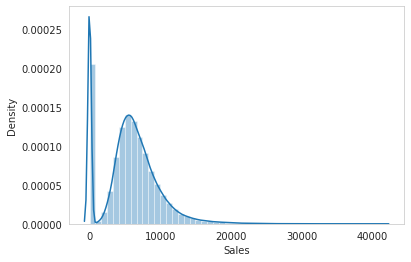

In [ ]:
#checking the distribution plot of the sales column.
sns.distplot(df_rossmann['Sales'].astype(np.int64))

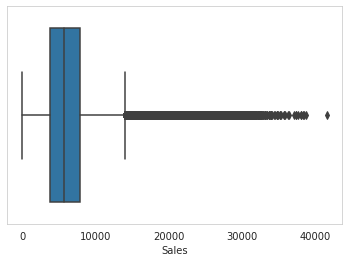

In [ ]:
#checking the box plot of the sales column.
sns.boxplot(df_rossmann['Sales'].astype(np.int64))

In [ ]:
#statistical values to understand data.
val1 = df_rossmann['Sales'].mean()
val2 = df_rossmann['Sales'].median()
val3 = df_rossmann['Sales'].mode()
print(f'For the sales column:\nMean: {val}\nMedian: {val2}\nMode: {val3}')

For the sales column:
Mean: 161
Median: 5744.0
Mode: 0    0
dtype: int64


<font color = "sky blue"><h3> **Observations:**</h3></font>
*   **Distribution plot for sales column**:

1.   Sales which shows 0 observation is the part where stores were <font color = "sky blue">**closed due to holidays or for refurbishment**.</font>
2.   Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>

*   **Box plot for sales column**:


1.   Maximum Data lies between the **100% quertile range of 0 - 14,000**.
2.   Outliers are seen after 14,000.

*   <font color = "sky blue">**Outliers will not be removed now as the zero sales looks important for further EDA**.</font>

*   The Mean median and mode will change when the 0 sales figures and outliers will be removed. 














In [ ]:
# df_rossmann = df_rossmann[-(df_rossmann['Sales'] == 0)]

In [ ]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [ ]:
# remove_outlier(df_rossmann,'Sales')

<hr color="grey">

### <font color = "sky blue">**Checking data for the store**

In [ ]:
print('------------------------------------Head---------------------------------------')
df_store.head()               #checking 1st 5 rows of the df
print('------------------------------------Tail---------------------------------------')
df_store.tail()               #checking last 5 rows of the df
print('------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_store.shape[0]}, Columns: {df_store.shape[1]}\n')
print('------------------------------------Info--------------------------------------\n')
df_store.info()               #information about the df
print('------------------------------------describe--------------------------------------\n')
df_store.describe()           #statictical description of the df
print('------------------------------------NUll_Value_count--------------------------------------\n')
df_store.isnull().sum()       #sum of the null values

------------------------------------Head---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


------------------------------------Tail---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


------------------------------------Shape-------------------------------------

Rows: 1115, Columns: 10

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


------------------------------------NUll_Value_count--------------------------------------



Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
print('------------------------------------Head---------------------------------------')
df_store.head()               #checking 1st 5 rows of the df
print('------------------------------------Tail---------------------------------------')
df_store.tail()               #checking last 5 rows of the df
print('------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_store.shape[0]}, Columns: {df_store.shape[1]}\n')
print('------------------------------------Info--------------------------------------\n')
df_store.info()               #information about the df
print('------------------------------------describe--------------------------------------\n')
df_store.describe()           #statictical description of the df
print('------------------------------------NUll_Value_count--------------------------------------\n')
df_store.isnull().sum()       #sum of the null values

------------------------------------Head---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


------------------------------------Tail---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


------------------------------------Shape-------------------------------------

Rows: 1115, Columns: 10

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


------------------------------------NUll_Value_count--------------------------------------



Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### <font color = "sky blue">**Null Values Treatment**

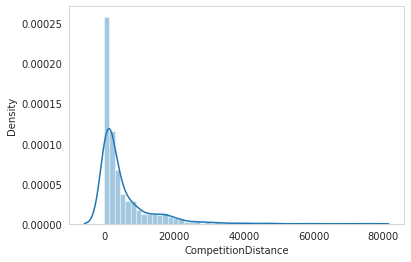

In [ ]:
#find distribution the dataset
sns.distplot(df_store['CompetitionDistance'])

<font color = "sky blue"><h3>**Observation:**</h3>

*    Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>
*   So, the <font color = "sky blue">**Median values will be used to fill the missing values**.</font>



In [ ]:
# filling competition distance with the median value
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)



*   <font color = "sky blue">**CompetitionOpenSinceMonth:**</font> As the dataset contains only 12 values of the month the <font color = "sky blue">**Mode Value will be used to fill the missing values.**</font>
*  <font color = "sky blue">**CompetitionOpenSinceYear:**</font>As the dataset contains values of the year the <font color = "sky blue">**Mode Value will be used to fill the missing values.**







In [ ]:
#find mode of the 2 columns
val1,val2 = df_store['CompetitionOpenSinceMonth'].mode()[0],df_store['CompetitionOpenSinceYear'].mode()[0]
print(f'Mode for CompetitionOpenSinceMonth: {val1} \nMode for CompetitionOpenSinceYear: {val2}  ')

Mode for CompetitionOpenSinceMonth: 9.0 
Mode for CompetitionOpenSinceYear: 2013.0  


In [ ]:
# filling competition open since month and year with modes of those columns
df_store['CompetitionOpenSinceMonth'].fillna(val1, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(val2, inplace = True)

When the promo2 is zero the Promo2SinceWeek,Promo2SinceYear, PromoInterval can be seen to be NaN.<br>
<font color = "sky blue">**Therefore, replacing NaN values with 0.**

In [ ]:
# inputing the nan values of promo2 related columns with 0
df_store['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_store['Promo2SinceYear'].fillna(value=0,inplace=True)
df_store['PromoInterval'].fillna(value=0,inplace=True)     

In [ ]:
#check
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<hr color="grey">

##  <font color = "sky blue">**Mergeing the two DataFrames**

In [ ]:
#merging the store data on rossmann using right join on store column
df_rms = pd.merge(df_rossmann,df_store, how='right', on = 'Store') #rms = rossmann Stores

In [ ]:
print('------------------------------------Head---------------------------------------\n')
df_rms.head()               #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rms.tail()               #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                            #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n')

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



In [ ]:
#Sorting the df in terms of Date and Store 
df_rms.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
#reseting the index as sort_values shuffles the rows 
df_rms.reset_index(drop=True, inplace=True)
print('------------------------------------Head---------------------------------------\n')
df_rms.head(3)#first 3 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n') #cheking if any data is missing after the above operations.

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



In [ ]:
df_rms['Year'] = df_rms['Date'].dt.year
df_rms['Month'] = df_rms['Date'].dt.month
df_rms['WeekOfYear'] = df_rms['Date'].dt.weekofyear
df_rms['DayOfYear'] = df_rms['Date'].dt.dayofyear

heatmap<br>
promos vs sales<br>
sales vs holidays<br>
weekdays vs weekends<br>
sales on diff days of week<br>
monthly sales✅ <br> 
yearly sales ✅ <br> 
customers sales<br>
CompetitionOpenSinceMonth sales comparision<br>


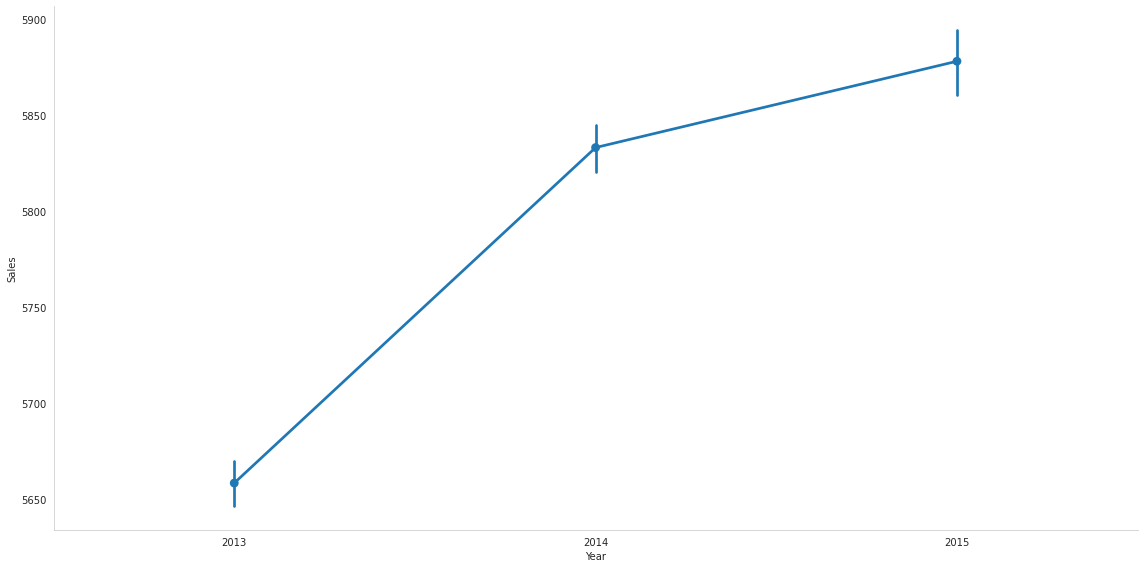

In [ ]:
#Yearly sales combined
sns.catplot( data=df_rms,x="Year", y="Sales", kind="point",size=8,aspect=2)

<font color = "sky blue"><h3>**Observation:**</h3>

*    Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>
*   So, the <font color = "sky blue">**Median values will be used to fill the missing values**.</font>

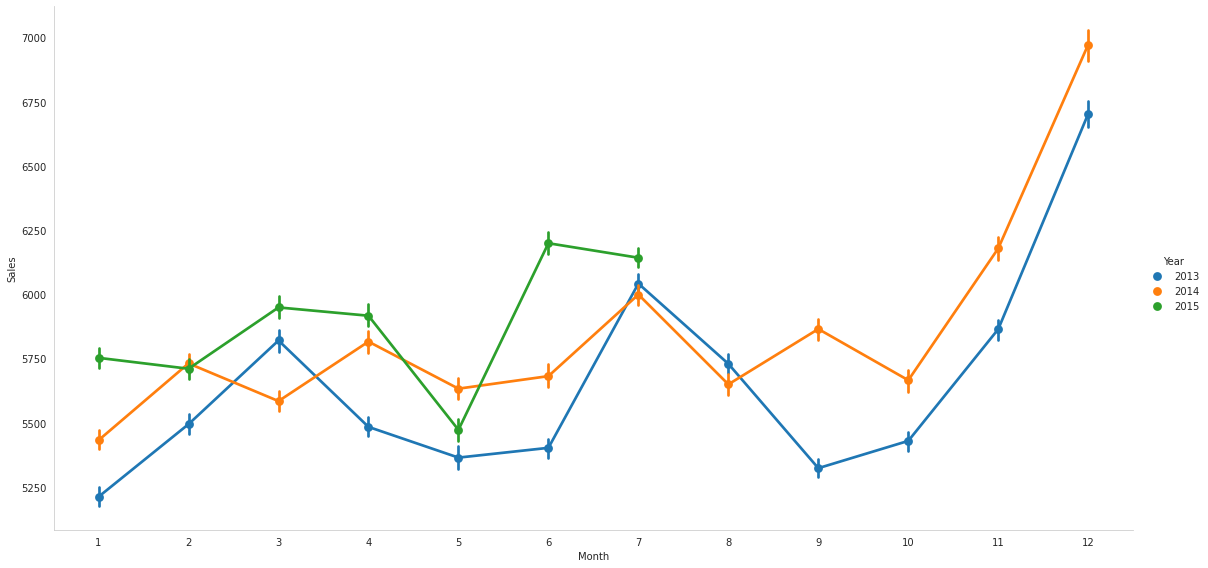

In [ ]:
#monthly sales of every year
sns.catplot( data=df_rms,x="Month", y="Sales", hue="Year", style="Year",kind="point",size=8,aspect=2)

In [ ]:
#customers sales
# sns.barplot(data = df_rms, x="island", y="body_mass_g", hue="sex")

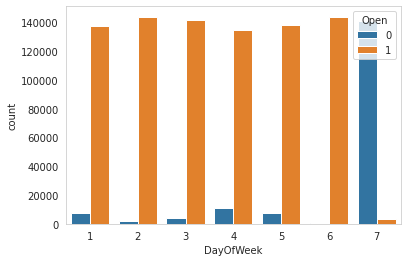

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data= df_rms)

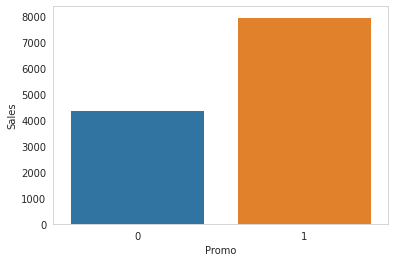

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(df_rms.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

([<matplotlib.patches.Wedge at 0x7fa24e807df0>,
 [Text(1.0159180704524655, -0.6386786939675845, 'Not-Affected'),
  Text(-0.9312582038409442, 0.5854555130656288, 'Affected')],
 [Text(0.5926188744306049, -0.37256257148109095, '82.1%'),
  Text(-0.5079590202768786, 0.31933937076307023, '17.9%')])

(-1.1045085311776077,
 1.1946791547298579,
 -1.1573233397609766,
 1.0528563411165743)

Text(0.5, 1.0, 'Sales Affected by Schoolholiday or Not ?')

[]

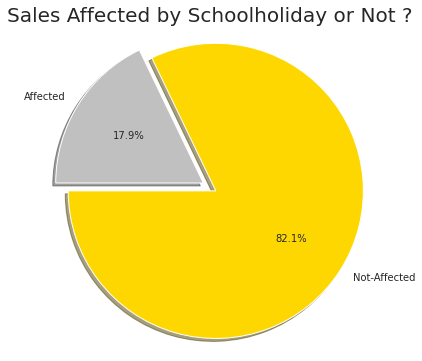

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df_rms['SchoolHoliday'].value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
#linear relation between sales and customers
# sns.lmplot(x= 'Sales' , y ='Customers',data=df_rms, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'})

([<matplotlib.patches.Wedge at 0x7fa2432fbc10>,
 [Text(0.15006444137023772, -1.1905799693578918, 'a'),
  Text(0.36633528625407635, 1.0372070468547463, 'b'),
  Text(-1.089218932599461, 0.6132716501411843, 'c'),
  Text(-1.0987383854704569, 0.05266839938496377, 'd')],
 [Text(0.08753759079930533, -0.6945049821254369, '54.0%'),
  Text(0.19981924704767798, 0.565749298284407, '31.2%'),
  Text(-0.6535313595596765, 0.36796299008471056, '13.3%'),
  Text(-0.5993118466202491, 0.02872821784634387, '1.5%')])

(-1.2335268321662218,
 1.1293968753483872,
 -1.2152285416401287,
 1.1194445676270988)

Text(0.5, 1.0, 'Distribution of different StoreTypes')

[]

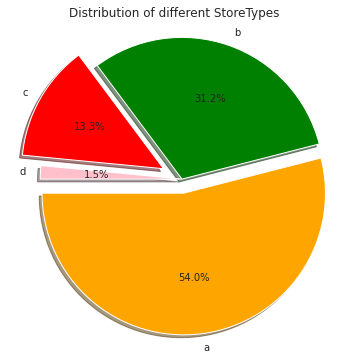

In [ ]:
#Different store types :
labels = 'a' , 'b' , 'c' , 'd'
sizes = df_store.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
df_s = df_store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

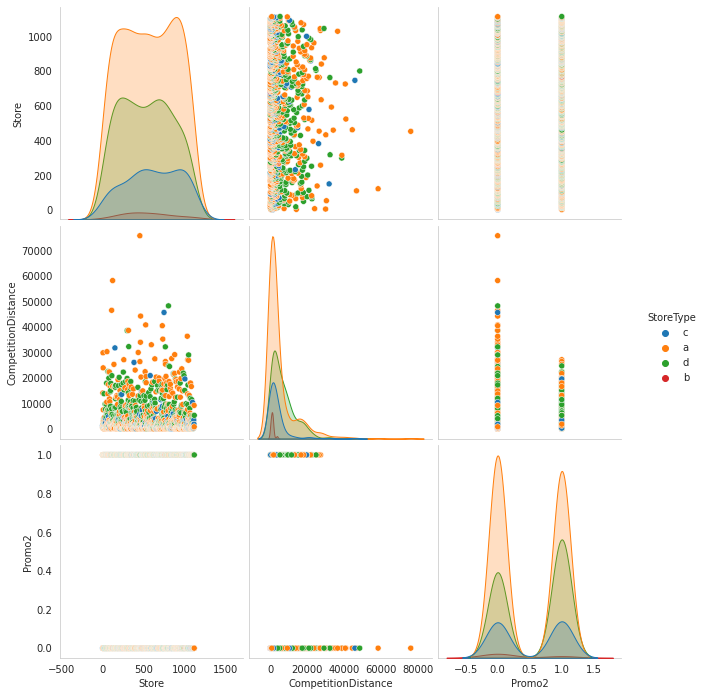

In [ ]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(df_s,hue='StoreType')
pp.fig.set_size_inches(10,10)

In [ ]:
numeric_features = list(df_rms.describe().columns)
numeric_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'WeekOfYear',
 'DayOfYear']

Text(0.5, 0, 'DayOfWeek')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs DayOfWeek- correlation: -0.4621250232272869')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Customers- correlation: 0.8947107733017032')

Text(0.5, 0, 'Open')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Open- correlation: 0.6784723460141816')

Text(0.5, 0, 'Promo')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Promo- correlation: 0.45234471982402763')

Text(0.5, 0, 'SchoolHoliday')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs SchoolHoliday- correlation: 0.08512403767585129')

Text(0.5, 0, 'CompetitionDistance')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs CompetitionDistance- correlation: -0.01886927383253159')

Text(0.5, 0, 'CompetitionOpenSinceMonth')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs CompetitionOpenSinceMonth- correlation: -0.023225715810030186')

Text(0.5, 0, 'CompetitionOpenSinceYear')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs CompetitionOpenSinceYear- correlation: 0.008739940947556559')

Text(0.5, 0, 'Promo2')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Promo2- correlation: -0.09103964725797146')

Text(0.5, 0, 'Promo2SinceWeek')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Promo2SinceWeek- correlation: -0.044143169036454356')

Text(0.5, 0, 'Promo2SinceYear')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Promo2SinceYear- correlation: -0.09105550849713276')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Year- correlation: 0.02351924254314464')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs Month- correlation: 0.04876761995482336')

Text(0.5, 0, 'WeekOfYear')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs WeekOfYear- correlation: 0.05294588273849331')

Text(0.5, 0, 'DayOfYear')

Text(0, 0.5, 'Sales')

Text(0.5, 1.0, 'Sales vs DayOfYear- correlation: 0.047502780176700926')

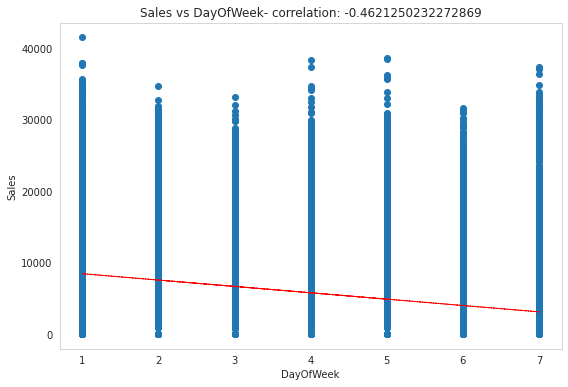

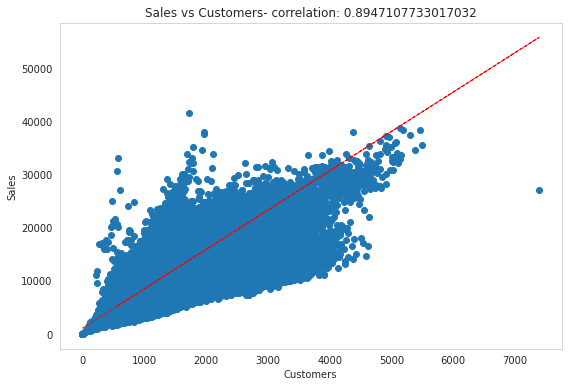

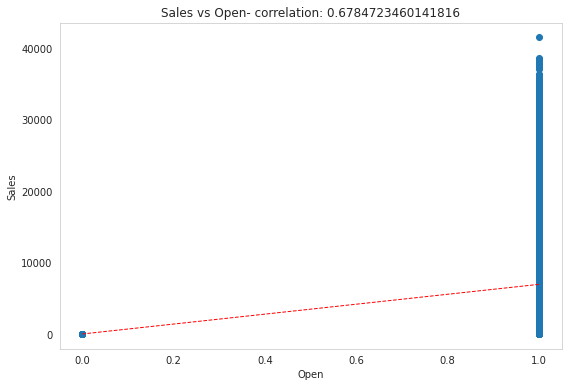

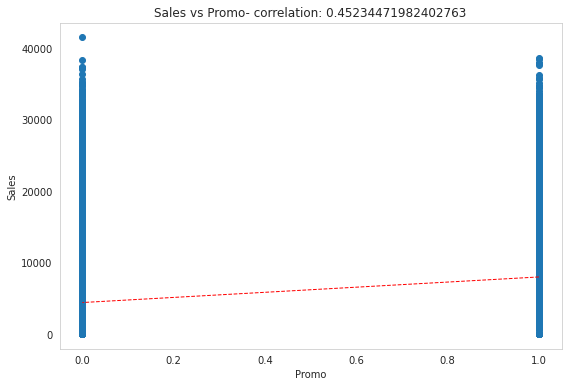

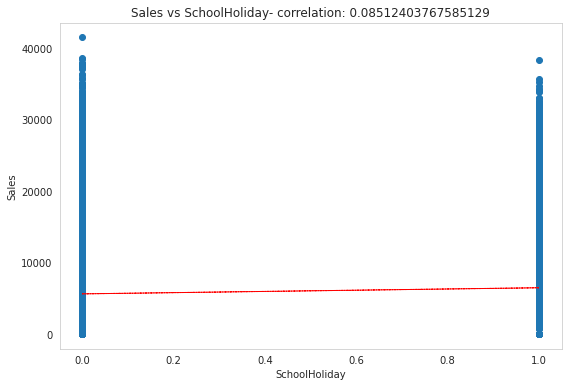

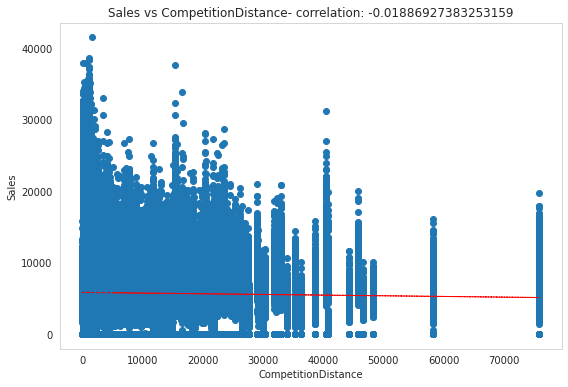

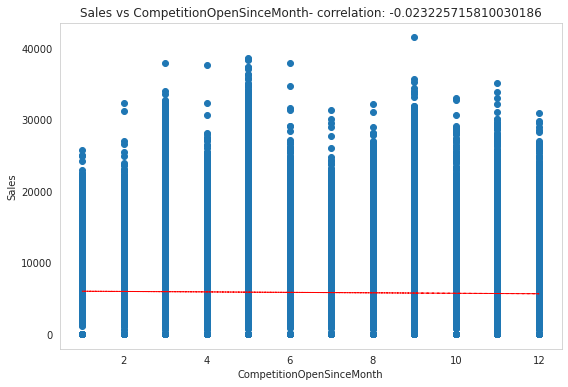

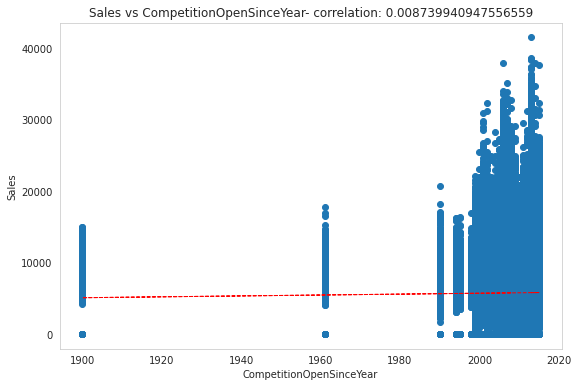

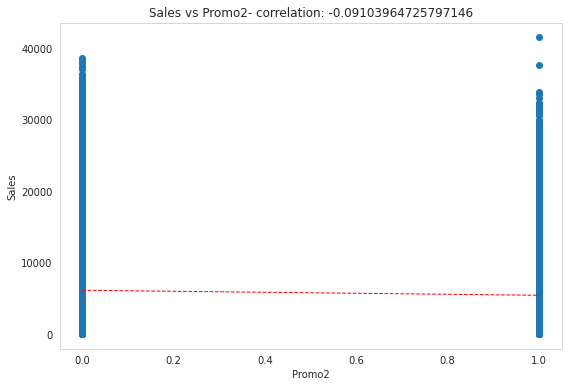

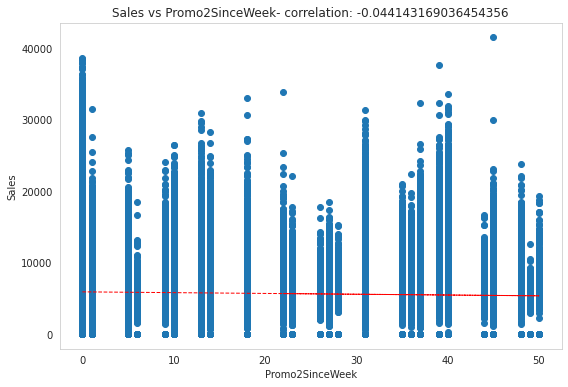

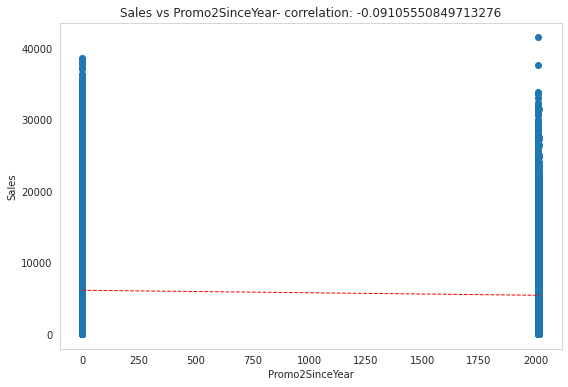

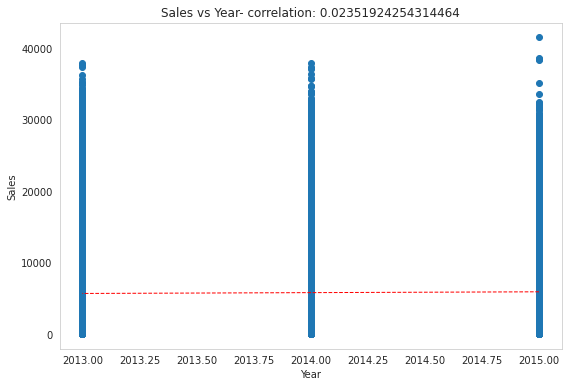

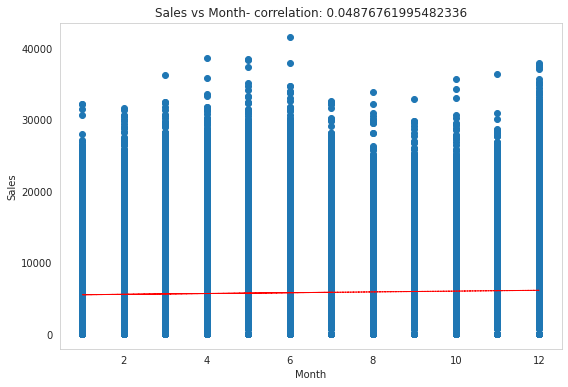

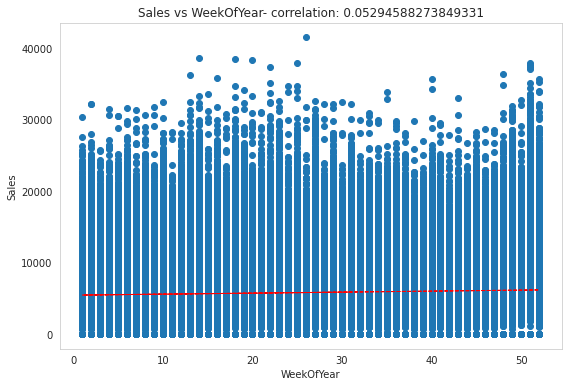

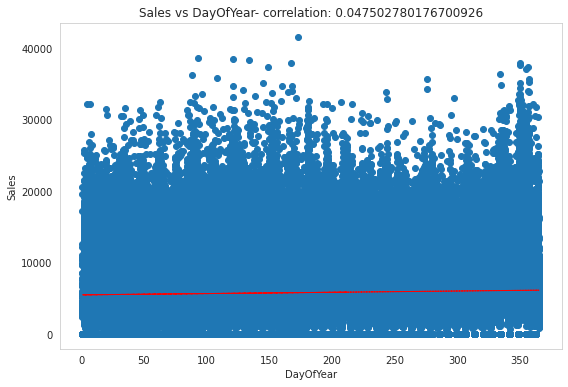

In [ ]:
for col in numeric_features:
  if col not in ['Store','Date','Sales']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_rms[col]
    label = df_rms['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_rms[col], df_rms['Sales'], 1)
    y_hat = np.poly1d(z)(df_rms[col])

    plt.plot(df_rms[col], y_hat, "r--", lw=1)

plt.show()

<Figure size 792x648 with 0 Axes>

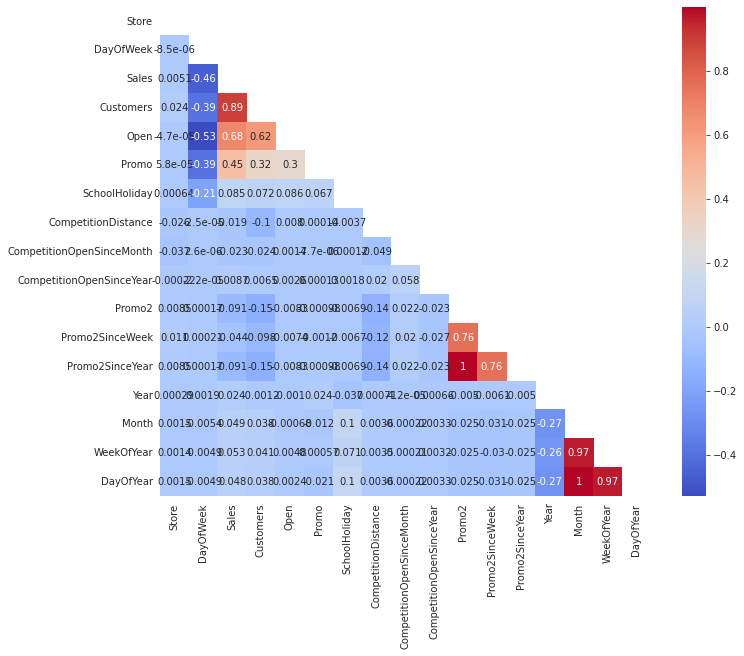

In [ ]:
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(df_rms.corr()))
sns.heatmap(df_rms.corr(),annot= True, cmap='coolwarm', mask = mask)

### <font color="sky blue">**Possitive Correlation**</font>
Customers and sales has the most positive correlation of **0.84**<br>
Followed by open and Sales with correlation of **0.68**
### <font color="sky blue">**Negative Correlation**</font>
Open and Days of week has most negative correlation of **-0.53**